<a href="https://colab.research.google.com/github/lilynguyen371/lilynguyen371/blob/main/DA2408_Do_an_cuoi_khoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Amazon Customer Behavior Survey.csv')

# Pre-Processing Data

## Data Cleaning

Deal with outlier, unexpected data input

In [ ]:
df = df.drop(df[df['age'] >= 53].index)
df = df.drop(df[df['age'] <= 3.5].index)
df.drop(df.loc[df['Gender'] == 'Prefer not to say'].index, inplace=True)
df.drop(df.loc[df['Gender'] == 'Others'].index, inplace=True)
df= df.drop(['Timestamp'], axis=1)
df= df.drop(['Purchase_Categories'], axis=1)
df.reset_index(drop=True, inplace=True)

## Data Transforming

### [Official] Ordinal Encoding & Re-scaling for quantiative

ordinal encoding -  ew-scaling for quantiative variable

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

columlist = ['Purchase_Frequency', 'Browsing_Frequency', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Saveforlater_Frequency',
'Review_Reliability', 'Review_Helpfulness', 'Recommendation_Helpfulness', 'Rating_Accuracy_Recommendations', 'Customer_Reviews_Importance', 'Personalized_Recommendation', 'Shopping_Satisfaction' ]
# Initializing OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Less than once a month', 'Once a month', 'Few times a month', 'Once a week','Multiple times a week'],
['Rarely', 'Few times a month', 'Few times a week', 'Multiple times a day'], ['No', 'Maybe', 'Yes'], ['Never', 'Rarely', 'Sometimes', 'Often','Always'],
['Never', 'Rarely', 'Sometimes', 'Often','Always'], ['Never', 'Rarely', 'Occasionally', 'Moderately','Heavily'], ['No', 'Sometimes', 'Yes'], ['No', 'Sometimes', 'Yes'],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5] ])

# Fitting and transforming the features
encoded_data = encoder.fit_transform(df[columlist])

# Creating a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=columlist)
for i in columlist:
  df[i] = encoded_df[i]
df

,age,Gender,Purchase_Frequency,Browsing_Frequency,Product_Search_Method,Rating_Accuracy_Recommendations,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,23,Female,2.0,2.0,Keyword,0.0,Multiple pages,0.0,2.0,2.0,Found a better price elsewhere,2.0,Yes,2.0,2.0,1.0,2.0,0.0,Competitive prices,Reducing packaging waste
1,23,Female,1.0,1.0,Keyword,2.0,Multiple pages,0.0,2.0,3.0,High shipping costs,1.0,No,4.0,2.0,1.0,1.0,1.0,Wide product selection,Reducing packaging waste
2,24,Female,1.0,1.0,Keyword,2.0,First page,4.0,1.0,2.0,Found a better price elsewhere,2.0,Yes,4.0,2.0,2.0,1.0,3.0,Competitive prices,Product quality and accuracy
3,22,Female,0.0,1.0,Filter,1.0,Multiple pages,0.0,2.0,2.0,High shipping costs,1.0,No,4.0,2.0,3.0,2.0,1.0,Competitive prices,Product quality and accuracy
4,21,Female,0.0,0.0,categories,4.0,Multiple pages,0.0,2.0,1.0,Changed my mind or no longer need the item,0.0,No,4.0,2.0,4.0,0.0,1.0,Wide product selection,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,23,Female,3.0,2.0,categories,2.0,Multiple pages,3.0,1.0,2.0,Found a better price elsewhere,2.0,Yes,3.0,1.0,2.0,1.0,3.0,Competitive prices,Customer service responsiveness
469,23,Female,3.0,2.0,Filter,2.0,Multiple pages,2.0,1.0,2.0,Found a better price elsewhere,2.0,Yes,4.0,1.0,2.0,1.0,2.0,Product recommendations,Reducing packaging waste
470,23,Female,1.0,2.0,categories,1.0,Multiple pages,2.0,1.0,2.0,High shipping costs,2.0,Yes,2.0,1.0,2.0,1.0,2.0,Wide product selection,Product quality and accuracy
471,23,Female,2.0,1.0,Keyword,1.0,Multiple pages,0.0,2.0,3.0,others,2.0,No,4.0,2.0,1.0,2.0,1.0,Wide product selection,Product quality and accuracy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              473 non-null    int64  
 1   Gender                           473 non-null    object 
 2   Purchase_Frequency               473 non-null    float64
 3   Browsing_Frequency               473 non-null    float64
 4   Product_Search_Method            471 non-null    object 
 5   Rating_Accuracy_Recommendations  473 non-null    float64
 6   Search_Result_Exploration        473 non-null    object 
 7   Customer_Reviews_Importance      473 non-null    float64
 8   Add_to_Cart_Browsing             473 non-null    float64
 9   Cart_Completion_Frequency        473 non-null    float64
 10  Cart_Abandonment_Factors         473 non-null    object 
 11  Saveforlater_Frequency           473 non-null    float64
 12  Review_Left           

### [Official] Scaling for Age

Scaling for Age

In [ ]:
import numpy as np
from sklearn import preprocessing
x_array = np.array(df['age'])
normalized_arr = preprocessing.normalize([x_array])
scaled_df = pd.DataFrame(normalized_arr)
df['age'] = scaled_df.transpose()

In [ ]:
df

,age,Gender,Purchase_Frequency,Browsing_Frequency,Product_Search_Method,Rating_Accuracy_Recommendations,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,0.034697,Female,2.0,2.0,Keyword,0.0,Multiple pages,0.0,2.0,2.0,Found a better price elsewhere,2.0,Yes,2.0,2.0,1.0,2.0,0.0,Competitive prices,Reducing packaging waste
1,0.034697,Female,1.0,1.0,Keyword,2.0,Multiple pages,0.0,2.0,3.0,High shipping costs,1.0,No,4.0,2.0,1.0,1.0,1.0,Wide product selection,Reducing packaging waste
2,0.036205,Female,1.0,1.0,Keyword,2.0,First page,4.0,1.0,2.0,Found a better price elsewhere,2.0,Yes,4.0,2.0,2.0,1.0,3.0,Competitive prices,Product quality and accuracy
3,0.033188,Female,0.0,1.0,Filter,1.0,Multiple pages,0.0,2.0,2.0,High shipping costs,1.0,No,4.0,2.0,3.0,2.0,1.0,Competitive prices,Product quality and accuracy
4,0.031680,Female,0.0,0.0,categories,4.0,Multiple pages,0.0,2.0,1.0,Changed my mind or no longer need the item,0.0,No,4.0,2.0,4.0,0.0,1.0,Wide product selection,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0.034697,Female,3.0,2.0,categories,2.0,Multiple pages,3.0,1.0,2.0,Found a better price elsewhere,2.0,Yes,3.0,1.0,2.0,1.0,3.0,Competitive prices,Customer service responsiveness
469,0.034697,Female,3.0,2.0,Filter,2.0,Multiple pages,2.0,1.0,2.0,Found a better price elsewhere,2.0,Yes,4.0,1.0,2.0,1.0,2.0,Product recommendations,Reducing packaging waste
470,0.034697,Female,1.0,2.0,categories,1.0,Multiple pages,2.0,1.0,2.0,High shipping costs,2.0,Yes,2.0,1.0,2.0,1.0,2.0,Wide product selection,Product quality and accuracy
471,0.034697,Female,2.0,1.0,Keyword,1.0,Multiple pages,0.0,2.0,3.0,others,2.0,No,4.0,2.0,1.0,2.0,1.0,Wide product selection,Product quality and accuracy


### [Optional] Lable encoder & Test

Lable encoder

In [ ]:
df = df.drop(df[df['Service_Appreciation'] == '.'].index)
df = df.drop(df[df['Improvement_Areas'] == '.'].index)
df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initializing the LabelEncoder
le = LabelEncoder()
lable_list = ['Gender','Product_Search_Method','Search_Result_Exploration','Cart_Abandonment_Factors','Review_Left','Service_Appreciation','Improvement_Areas']

for i in lable_list:
  le.fit(df[i])
  df[i] = le.transform(df[i])
df


,age,Gender,Purchase_Frequency,Browsing_Frequency,Product_Search_Method,Rating_Accuracy_Recommendations,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,0.034697,0,2.0,2.0,1,0.0,1,0.0,2.0,2.0,1,2.0,1,2.0,2.0,1.0,2.0,0.0,1,8
1,0.034697,0,1.0,1.0,1,2.0,1,0.0,2.0,3.0,2,1.0,0,4.0,2.0,1.0,1.0,1.0,7,8
2,0.036205,0,1.0,1.0,1,2.0,0,4.0,1.0,2.0,1,2.0,1,4.0,2.0,2.0,1.0,3.0,1,6
3,0.033188,0,0.0,1.0,0,1.0,1,0.0,2.0,2.0,2,1.0,0,4.0,2.0,3.0,2.0,1.0,1,6
4,0.031680,0,0.0,0.0,2,4.0,1,0.0,2.0,1.0,0,0.0,0,4.0,2.0,4.0,0.0,1.0,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.034697,0,3.0,2.0,2,2.0,1,3.0,1.0,2.0,1,2.0,1,3.0,1.0,2.0,1.0,3.0,1,1
468,0.034697,0,3.0,2.0,0,2.0,1,2.0,1.0,2.0,1,2.0,1,4.0,1.0,2.0,1.0,2.0,4,8
469,0.034697,0,1.0,2.0,2,1.0,1,2.0,1.0,2.0,2,2.0,1,2.0,1.0,2.0,1.0,2.0,7,6
470,0.034697,0,2.0,1.0,1,1.0,1,0.0,2.0,3.0,3,2.0,0,4.0,2.0,1.0,2.0,1.0,7,6


<Axes: >

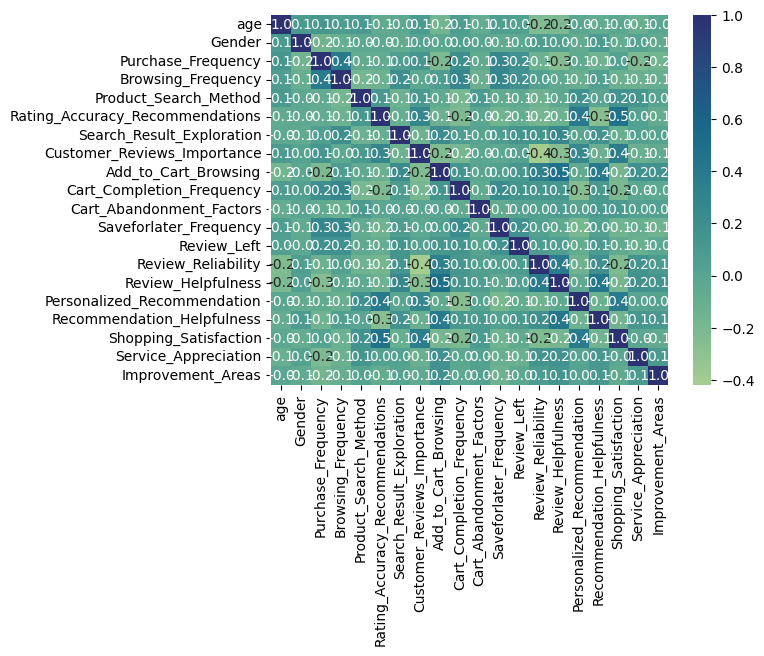

In [ ]:
sns.heatmap(df.corr(),annot=True, fmt=".1f",cmap="crest")

###[Official] One - hot encoding

One - hot encoding

In [ ]:
df = pd.get_dummies(df, columns=['Gender',	'Product_Search_Method', 'Search_Result_Exploration',	'Cart_Abandonment_Factors',	'Review_Left',	'Service_Appreciation',	'Improvement_Areas'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 52 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   age                                                                                               473 non-null    float64
 1   Purchase_Frequency                                                                                473 non-null    float64
 2   Browsing_Frequency                                                                                473 non-null    float64
 3   Rating_Accuracy_Recommendations                                                                   473 non-null    float64
 4   Customer_Reviews_Importance                                                                       473 non-null    float64
 5   A

In [ ]:
df= df.drop(['Service_Appreciation_.','Improvement_Areas_.'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 50 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   age                                                                                               473 non-null    float64
 1   Purchase_Frequency                                                                                473 non-null    float64
 2   Browsing_Frequency                                                                                473 non-null    float64
 3   Rating_Accuracy_Recommendations                                                                   473 non-null    float64
 4   Customer_Reviews_Importance                                                                       473 non-null    float64
 5   A

##Feature Selection

###Chi-square Test

#### Test loop Kbest

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
# Load the dataset
y = df['Purchase_Frequency']
X = df.drop(['Purchase_Frequency'], axis=1)

# Applying Chi-Square feature selection and
# Selecting top k features
for k in range(30,32):
  chi2_selector = SelectKBest(chi2, k=k)
  X_new = chi2_selector.fit_transform(X, y)
  selected_features = X.columns[chi2_selector.get_support()]
  selected_features_df = pd.DataFrame([])
  for j in selected_features:
    selected_features_df[j] = df[j]
  y = df['Purchase_Frequency']
  X = selected_features_df
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model_kNN = KNeighborsClassifier(n_neighbors=10)
  model_kNN.fit(X_train, y_train)
  test_score_kNN = model_kNN.score(X_test, y_test)

  model_logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
  model_logistic.fit(X_train, y_train)
  test_score__logistic = model_logistic.score(X_test, y_test)

  model_softmax = LogisticRegression(C=1e5, solver = 'lbfgs',max_iter=1000)
  model_softmax.fit(X_train, y_train)
  test_score_softmax = model_softmax.score(X_test, y_test)

  model_svm = SVC(kernel = 'rbf', random_state = 0)
  model_svm.fit(X_train, y_train)
  test_score_svm = model_svm.score(X_test, y_test)

  model_forest = RandomForestRegressor(n_estimators = 500, random_state = 42)
  model_forest.fit(X_train, y_train)
  test_score_forest = model_forest.score(X_test, y_test)
  print(k, test_score_kNN, test_score__logistic, test_score_softmax, test_score_svm, test_score_forest)


30 0.4842105263157895 0.5578947368421052 0.5263157894736842 0.5052631578947369 0.348019166940712


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=31 is greater than n_features=30. All the features will be returned.
  warnings.warn(


31 0.4842105263157895 0.5578947368421052 0.5263157894736842 0.5052631578947369 0.348019166940712


####[Official] Chi square test

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
# Load the dataset
y = df['Purchase_Frequency']
X = df.drop(['Purchase_Frequency'], axis=1)
chi2_selector = SelectKBest(chi2, k=30)
X_new = chi2_selector.fit_transform(X, y)
selected_features = X.columns[chi2_selector.get_support()]

In [ ]:
selected_features_df = pd.DataFrame()
for i in selected_features:
  selected_features_df[i] = df[i]
selected_features_df

,Browsing_Frequency,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Review_Helpfulness,Recommendation_Helpfulness,Gender_Female,Gender_Male,...,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_Add more familiar brands to the list,Improvement_Areas_Customer service responsiveness,Improvement_Areas_Irrelevant product suggestions,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI
0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,True,False,...,False,False,False,False,False,False,False,True,False,False
1,1.0,0.0,2.0,3.0,1.0,4.0,2.0,1.0,True,False,...,False,True,False,False,False,False,False,True,False,False
2,1.0,4.0,1.0,2.0,2.0,4.0,2.0,1.0,True,False,...,False,False,False,False,False,True,False,False,False,False
3,1.0,0.0,2.0,2.0,1.0,4.0,2.0,2.0,True,False,...,False,False,False,False,False,True,False,False,False,False
4,0.0,0.0,2.0,1.0,0.0,4.0,2.0,0.0,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2.0,3.0,1.0,2.0,2.0,3.0,1.0,1.0,True,False,...,False,False,False,True,False,False,False,False,False,False
469,2.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0,True,False,...,False,False,False,False,False,False,False,True,False,False
470,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,True,False,...,False,True,False,False,False,True,False,False,False,False
471,1.0,0.0,2.0,3.0,2.0,4.0,2.0,2.0,True,False,...,False,True,False,False,False,True,False,False,False,False


### Testing Accuracy of K Best Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
y = df['Purchase_Frequency']
X = selected_features_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####kNN

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)

print(test_score)

0.4842105263157895


In [ ]:
k_list = range(2, 20)
score_list = []

for k in k_list:
  model = KNeighborsClassifier(k)
  model.fit(X_train, y_train)
  test_score = model.score(X_test, y_test)
  score_list.append(test_score)


print(score_list)

[0.3894736842105263, 0.35789473684210527, 0.4421052631578947, 0.4842105263157895, 0.49473684210526314, 0.4631578947368421, 0.49473684210526314, 0.5157894736842106, 0.4842105263157895, 0.5263157894736842, 0.5263157894736842, 0.49473684210526314, 0.49473684210526314, 0.5052631578947369, 0.5578947368421052, 0.5157894736842106, 0.4842105263157895, 0.5157894736842106]


####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.5578947368421052


####Softmax Regression

In [ ]:

model = LogisticRegression(C=1e5, solver = 'lbfgs',max_iter=1000)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.5263157894736842


####SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.5052631578947369


####Random Forest Rgression


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.3513678594006988


### Testing Accuracy of quantiative variable

In [ ]:
df_quantiative = pd.DataFrame(data={})
df_qualitiative = pd.DataFrame(data={})
for i in df.columns.values:
  if df[i].dtype != 'bool':
    df_quantiative[i] = df[i]
  else:
    df_qualitiative[i] = df[i]

In [ ]:
df_quantiative

,age,Purchase_Frequency,Browsing_Frequency,Rating_Accuracy_Recommendations,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction
0,0.034697,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0
1,0.034697,1.0,1.0,2.0,0.0,2.0,3.0,1.0,4.0,2.0,1.0,1.0,1.0
2,0.036205,1.0,1.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0,2.0,1.0,3.0
3,0.033188,0.0,1.0,1.0,0.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,1.0
4,0.031680,0.0,0.0,4.0,0.0,2.0,1.0,0.0,4.0,2.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0.034697,3.0,2.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,2.0,1.0,3.0
469,0.034697,3.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,2.0
470,0.034697,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
471,0.034697,2.0,1.0,1.0,0.0,2.0,3.0,2.0,4.0,2.0,1.0,2.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
y = df_quantiative['Purchase_Frequency']
X = df_quantiative.drop(['Purchase_Frequency'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)

print(test_score)

0.5157894736842106


In [ ]:
k_list = range(2, 20)
score_list = []

for k in k_list:
  model = KNeighborsClassifier(k)
  model.fit(X_train, y_train)
  test_score = model.score(X_test, y_test)
  score_list.append(test_score)


print(score_list)

[0.37894736842105264, 0.3684210526315789, 0.45263157894736844, 0.3894736842105263, 0.4421052631578947, 0.43157894736842106, 0.4105263157894737, 0.4631578947368421, 0.5157894736842106, 0.47368421052631576, 0.49473684210526314, 0.47368421052631576, 0.4631578947368421, 0.4842105263157895, 0.5157894736842106, 0.4631578947368421, 0.45263157894736844, 0.4631578947368421]


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.4631578947368421


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e5, solver = 'lbfgs',
                           multi_class = 'multinomial')
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.45263157894736844


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.5052631578947369


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.42566417827523817


In [ ]:
df_qualitiative['Purchase_Frequency'] = df_quantiative['Purchase_Frequency']
df_qualitiative

,Gender_Female,Gender_Male,Product_Search_Method_Filter,Product_Search_Method_Keyword,Product_Search_Method_categories,Product_Search_Method_others,Search_Result_Exploration_First page,Search_Result_Exploration_Multiple pages,Cart_Abandonment_Factors_Changed my mind or no longer need the item,Cart_Abandonment_Factors_Found a better price elsewhere,...,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges,Purchase_Frequency
0,True,False,False,True,False,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,2.0
1,True,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,1.0
2,True,False,False,True,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,1.0
3,True,False,True,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,0.0
4,True,False,False,False,True,False,False,True,True,False,...,True,False,False,False,False,False,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,True,False,False,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,3.0
469,True,False,True,False,False,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,3.0
470,True,False,False,False,True,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,1.0
471,True,False,False,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,2.0


In [ ]:
df

,age,Purchase_Frequency,Browsing_Frequency,Rating_Accuracy_Recommendations,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Review_Helpfulness,...,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges
0,23,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,...,False,False,False,True,False,False,False,False,False,False
1,23,1.0,1.0,2.0,0.0,2.0,3.0,1.0,4.0,2.0,...,False,False,False,True,False,False,False,False,False,False
2,24,1.0,1.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0,...,False,True,False,False,False,False,False,False,False,False
3,22,0.0,1.0,1.0,0.0,2.0,2.0,1.0,4.0,2.0,...,False,True,False,False,False,False,False,False,False,False
4,21,0.0,0.0,4.0,0.0,2.0,1.0,0.0,4.0,2.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,23,3.0,2.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
469,23,3.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,...,False,False,False,True,False,False,False,False,False,False
470,23,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,False,True,False,False,False,False,False,False,False,False
471,23,2.0,1.0,1.0,0.0,2.0,3.0,2.0,4.0,2.0,...,False,True,False,False,False,False,False,False,False,False


#Selecting Model Learning

## Test for all feature no select

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y = df['Purchase_Frequency']
X = df.drop(['Purchase_Frequency'], axis=1)

In [ ]:
df

,age,Purchase_Frequency,Browsing_Frequency,Rating_Accuracy_Recommendations,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Review_Helpfulness,...,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges
0,0.034697,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,...,False,False,False,True,False,False,False,False,False,False
1,0.034697,1.0,1.0,2.0,0.0,2.0,3.0,1.0,4.0,2.0,...,False,False,False,True,False,False,False,False,False,False
2,0.036205,1.0,1.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0,...,False,True,False,False,False,False,False,False,False,False
3,0.033188,0.0,1.0,1.0,0.0,2.0,2.0,1.0,4.0,2.0,...,False,True,False,False,False,False,False,False,False,False
4,0.031680,0.0,0.0,4.0,0.0,2.0,1.0,0.0,4.0,2.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0.034697,3.0,2.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
469,0.034697,3.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,...,False,False,False,True,False,False,False,False,False,False
470,0.034697,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,False,True,False,False,False,False,False,False,False,False
471,0.034697,2.0,1.0,1.0,0.0,2.0,3.0,2.0,4.0,2.0,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###kNN

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)

print(test_score)

0.45263157894736844


In [ ]:
k_list = range(2, 10)
score_list = []

for k in k_list:
  model = KNeighborsClassifier(k)
  model.fit(X_train, y_train)
  test_score = model.score(X_test, y_test)
  score_list.append(test_score)


print(score_list)

[0.37894736842105264, 0.43157894736842106, 0.43157894736842106, 0.45263157894736844, 0.3894736842105263, 0.4, 0.43157894736842106, 0.42105263157894735]


###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.49473684210526314


###? model

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)
clf = model.score(X_test, y_test)
print(test_score)

0.49473684210526314


###Softmax Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e5, solver = 'lbfgs',
                           multi_class = 'multinomial')
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.5368421052631579


###SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.5263157894736842


###Random Forest Rgression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(test_score)

0.3884764872433104


##VarianceThreshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.25) #Removing both constant and quasi-constant
var_thr.fit(X)

var_thr.get_support()


array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
concol = [column for column in X.columns
          if column not in X.columns[var_thr.get_support()]]

for features in concol:
    print(features)

age
Gender_Female
Gender_Male
Product_Search_Method_Filter
Product_Search_Method_Keyword
Product_Search_Method_categories
Product_Search_Method_others
Search_Result_Exploration_First page
Search_Result_Exploration_Multiple pages
Cart_Abandonment_Factors_Changed my mind or no longer need the item
Cart_Abandonment_Factors_Found a better price elsewhere
Cart_Abandonment_Factors_High shipping costs
Cart_Abandonment_Factors_others
Review_Left_No
Review_Left_Yes
Service_Appreciation_All the above
Service_Appreciation_Competitive prices
Service_Appreciation_Customer service
Service_Appreciation_Customer service 
Service_Appreciation_Product recommendations
Service_Appreciation_Quick delivery
Service_Appreciation_User-friendly website/app interface
Service_Appreciation_Wide product selection
Improvement_Areas_Add more familiar brands to the list
Improvement_Areas_Customer service responsiveness
Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues 
Imp

In [ ]:
from sklearn.feature_selection import VarianceThreshold


# Instantiate the VarianceThreshold object with a threshold value
threshold = 0.1  # Adjust threshold as needed
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(X)

# Get the indices of features with high variance
high_variance_indices = selector.get_support(indices=True)

# Subset your data with selected features
selected_data = X.iloc[:, high_variance_indices]
selected_data

,Browsing_Frequency,Rating_Accuracy_Recommendations,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,...,Review_Left_No,Review_Left_Yes,Service_Appreciation_Competitive prices,Service_Appreciation_Product recommendations,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_Customer service responsiveness,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Shipping speed and reliability
0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,False,True,True,False,False,False,False,False,True,False
1,1.0,2.0,0.0,2.0,3.0,1.0,4.0,2.0,1.0,1.0,...,True,False,False,False,False,True,False,False,True,False
2,1.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0,2.0,1.0,...,False,True,True,False,False,False,False,True,False,False
3,1.0,1.0,0.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,...,True,False,True,False,False,False,False,True,False,False
4,0.0,4.0,0.0,2.0,1.0,0.0,4.0,2.0,4.0,0.0,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,2.0,1.0,...,False,True,True,False,False,False,True,False,False,False
469,2.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,...,False,True,False,True,False,False,False,False,True,False
470,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,...,False,True,False,False,False,True,False,True,False,False
471,1.0,1.0,0.0,2.0,3.0,2.0,4.0,2.0,1.0,2.0,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
import pandas as pd
import numpy as np
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=100  # number of iterations to perform
)
feat_selector.fit(X, y)

print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X.columns[i], " - Ranking: ", feat_selector.ranking_[i])

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	42
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	42
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	42
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	42
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	42
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	42
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	42
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	42
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	42
I

In [ ]:
new_X = pd.DataFrame()
selected_list = ['age','Browsing_Frequency','Customer_Reviews_Importance','Customer_Reviews_Importance','Add_to_Cart_Browsing','Review_Helpfulness']
for i in selected_list:
  new_X[i] = X[i]
new_X

,age,Browsing_Frequency,Customer_Reviews_Importance,Add_to_Cart_Browsing,Review_Helpfulness
0,0.034697,2.0,0.0,2.0,2.0
1,0.034697,1.0,0.0,2.0,2.0
2,0.036205,1.0,4.0,1.0,2.0
3,0.033188,1.0,0.0,2.0,2.0
4,0.031680,0.0,0.0,2.0,2.0
...,...,...,...,...,...
468,0.034697,2.0,3.0,1.0,1.0
469,0.034697,2.0,2.0,1.0,1.0
470,0.034697,2.0,2.0,1.0,1.0
471,0.034697,1.0,0.0,2.0,2.0


In [ ]:
y = df['Purchase_Frequency']
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)
model_kNN = KNeighborsClassifier(n_neighbors=10)
model_kNN.fit(X_train, y_train)
test_score_kNN = model_kNN.score(X_test, y_test)

model_logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
model_logistic.fit(X_train, y_train)
test_score__logistic = model_logistic.score(X_test, y_test)

model_softmax = LogisticRegression(C=1e5, solver = 'lbfgs',max_iter=1000)
model_softmax.fit(X_train, y_train)
test_score_softmax = model_softmax.score(X_test, y_test)

model_svm = SVC(kernel = 'rbf', random_state = 0)
model_svm.fit(X_train, y_train)
test_score_svm = model_svm.score(X_test, y_test)

model_forest = RandomForestRegressor(n_estimators = 500, random_state = 42)
model_forest.fit(X_train, y_train)
test_score_forest = model_forest.score(X_test, y_test)
print(test_score_kNN, test_score__logistic, test_score_softmax, test_score_svm, test_score_forest)

0.4421052631578947 0.4421052631578947 0.4421052631578947 0.5052631578947369 0.14294602427749326


## Tune Hyperparameters

###GridSearchCV() for LogisticRegression

In [ ]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(log_model,param_grid = param_grid, cv = 5, verbose=True,n_jobs=-1)
clf
best_clf = clf.fit(X,y)
best_clf.best_estimator_
print(f'Accuracy - : {best_clf.score(X,y):.3f}')


Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Accuracy - : 0.438


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5200 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

###GridSearchCV() for kNN

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(2, 10),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)

print(test_score)

{'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
0.3704561403508772
0.49473684210526314


###GridSearchCV for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# train the model on train set
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)

print(test_score)

              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76        23
         1.0       0.10      0.10      0.10        10
         2.0       0.48      0.72      0.58        39
         3.0       0.00      0.00      0.00        17
         4.0       0.00      0.00      0.00         6

    accuracy                           0.51        95
   macro avg       0.26      0.33      0.29        95
weighted avg       0.38      0.51      0.43        95

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.289 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.289 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.289 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.293 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.293 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=

## ensemble methods in machine learning

### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Create the Bagging classifier
bagging_classifier = BaggingClassifier(SVC(kernel = 'rbf', random_state = 0), n_estimators=100)

classifiers = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.45263157894736844


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Create the Bagging classifier
bagging_classifier = BaggingClassifier(KNeighborsClassifier(), n_estimators=100)

classifiers = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4842105263157895


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Create the Bagging classifier
bagging_classifier = BaggingClassifier(LogisticRegression(), n_estimators=100)

classifiers = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4842105263157895


###Gradient Boosting Machine for Classification

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
# make a single prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4105263157894737


## Optimize **thresold** logistis regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.11578947368421053
[[ 1 22  0  0  0]
 [ 0 10  0  0  0]
 [ 1 38  0  0  0]
 [ 1 16  0  0  0]
 [ 0  6  0  0  0]]

******** For i = 0.1 ******
Our testing accuracy is 0.1368421052631579
[[ 3 20  0  0  0]
 [ 0 10  0  0  0]
 [ 9 30  0  0  0]
 [ 5 12  0  0  0]
 [ 1  5  0  0  0]]

******** For i = 0.15 ******
Our testing accuracy is 0.17894736842105263
[[ 8 15  0  0  0]
 [ 1  9  0  0  0]
 [19 20  0  0  0]
 [ 9  8  0  0  0]
 [ 5  1  0  0  0]]

******** For i = 0.2 ******
Our testing accuracy is 0.17894736842105263
[[11 12  0  0  0]
 [ 4  6  0  0  0]
 [24 15  0  0  0]
 [15  2  0  0  0]
 [ 5  1  0  0  0]]

******** For i = 0.25 ******
Our testing accuracy is 0.23157894736842105
[[16  7  0  0  0]
 [ 4  6  0  0  0]
 [30  9  0  0  0]
 [15  2  0  0  0]
 [ 6  0  0  0  0]]

******** For i = 0.3 ******
Our testing accuracy is 0.25263157894736843
[[19  4  0  0  0]
 [ 5  5  0  0  0]
 [34  5  0  0  0]
 [17  0  0  0  0]
 [ 6  0  0  0  0]]

******** For 

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

def custom_predict(X, threshold):
    probs = model.predict_proba(X_train)
    return (probs[:, 1] > threshold).astype(int)

new_preds = custom_predict(X=X_train, threshold=0.5)
print(new_preds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [ ]:
# importing the necessary packages
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc
import matplotlib.pyplot as plt
# logistic regression model
lr = LogisticRegression(random_state=0)
# fitting the model
lr.fit(X_train, y_train)
# predicting
print('prediction with threshold 0.5 :')
y_pred = lr.predict(X_test)
print(y_pred)
# changing threshold and predicting
print("Evaluation metrics with threshold 0.5:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average=None))
print("Recall:", recall_score(y_test, y_pred,average=None))
print("F1 score:", f1_score(y_test, y_pred,average=None))
for i in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]:
  print(f'prediction with threshold {i} :')
  y_pred_new_threshold = (lr.predict_proba(X_test)[:, 1] >= i).astype(int)
  print(y_pred_new_threshold)

  # Evaluation metrics for new threshold
  print(f"Evaluation metrics with threshold {i}:")
  print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold))
  print("Precision:", precision_score(y_test, y_pred_new_threshold,average=None))
  print("Recall:", recall_score(y_test, y_pred_new_threshold,average=None))
  print("F1 score:", f1_score(y_test, y_pred_new_threshold,average=None))

prediction with threshold 0.5 :
[1. 0. 1. 2. 2. 2. 3. 0. 3. 0. 3. 2. 2. 0. 2. 2. 1. 2. 2. 1. 2. 2. 0. 3.
 0. 3. 3. 0. 0. 2. 3. 0. 0. 0. 0. 0. 1. 3. 0. 2. 2. 2. 2. 1. 0. 2. 2. 1.
 0. 2. 2. 2. 3. 0. 4. 2. 0. 4. 1. 2. 2. 2. 2. 0. 2. 2. 2. 2. 3. 2. 0. 0.
 2. 2. 0. 2. 1. 1. 1. 4. 2. 2. 2. 1. 2. 0. 2. 2. 1. 0. 2. 2. 2. 3. 0.]
Evaluation metrics with threshold 0.5:
Accuracy: 0.5578947368421052
Precision: [0.72       0.30769231 0.58139535 0.45454545 0.33333333]
Recall: [0.7826087  0.4        0.64102564 0.29411765 0.16666667]
F1 score: [0.75       0.34782609 0.6097561  0.35714286 0.22222222]
prediction with threshold 0.05 :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
Evaluation metrics with threshold 0.05:
Accuracy: 0.11578947368421053
Precision: [0.33333333 0.10869565 0.         0.         0.        ]
Recall: [0.04347826 1.         0.         0. 

ValueError: multi_class must be in ('ovo', 'ovr')

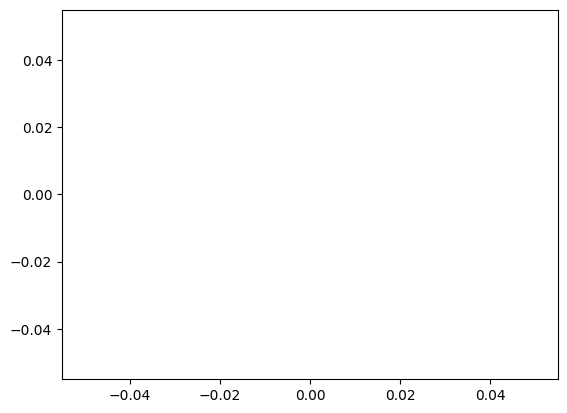

In [ ]:
y_scores = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label='your_label')
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')
print('Area Under the ROC Curve for threshold 0.5:', roc_auc_score(y_test, y_scores))

# For Threshold 0.9
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_new_threshold)
print('Area Under the ROC Curve for threshold 0.9:', roc_auc_score(y_test, y_pred_new_threshold))
plt.plot(fpr_, tpr_, label = 'Threshold = 0.9')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, label = 'Threshold = 0.5')
print('Area Under the Curve (AUC) for threshold 0.5:', auc(recall, precision))
# For Threshold 0.9
precision_, recall_, thresholds_ = precision_recall_curve(y_test, y_pred_new_threshold)
plt.plot(precision_, recall_, label = 'Threshold = 0.9')
print('Area Under the Curve (AUC) for threshold 0.9:', auc(recall_, precision_))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

ValueError: multiclass format is not supported

## AUC-ROC Curve

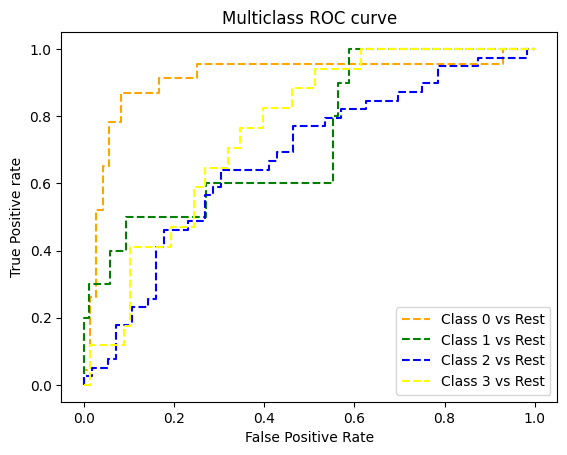

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 4
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=400);